**Задание 1:** Подготовка данных (Шаг 1, 2)

In [5]:
import pandas as pd
import numpy as np

# Загрузка данных из CSV файла
df = pd.read_csv('games.csv')

# Замена названия столбцов на нижний регистр
df.columns = df.columns.str.lower()

# Обработка 'tbd'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Преобразование типов данных
# Обработка NaN в year_of_release перед преобразованием в целый тип
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].astype(float)
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].astype(float)

# Обработка пропусков
df['user_score'] = df['user_score'].fillna(0)
df['critic_score'] = df['critic_score'].replace(np.nan, np.nan)  # оставляем пустыми

# Суммарные продажи
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Сохранение обработанных данных в новый CSV файл
df.to_csv('update_games.csv', index=False)

# Результат
print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

**ВЫВОДЫ:**

---

▎1. Замена названий столбцов

В коде мы заменяем названия столбцов на нижний регистр с помощью следующей строки:

*df.columns = df.columns.str.lower()*

**!** Это делается для унификации названий столбцов, что позволяет избежать ошибок при обращении к ним в дальнейшем анализе.

▎2. Преобразование данных в нужные типы

В коде мы выполняем преобразование следующих столбцов:

*   year_of_release: Преобразуется в целый тип (int). Перед этим мы заполняем пропуски нулями, так как год выпуска должен быть числом. Использование нуля может быть оправдано, если мы рассматриваем его как "неизвестный год".
*   na_sales, eu_sales, jp_sales, other_sales: Преобразуются в тип float. Эти столбцы содержат значения продаж, которые могут быть дробными.
*   critic_score, user_score: Преобразуются в тип float. Эти столбцы содержат оценки, которые также могут быть дробными значениями.

▎3. Обработка пропусков

*   user_score: Пропуски заменяются на 0 с помощью метода fillna(0). Это сделано для того, чтобы избежать проблем с дальнейшими вычислениями. В данном контексте 0 может означать отсутствие оценки.
*   critic_score: Пропуски остаются пустыми (т.е. NaN). Это решение принято, так как пустое значение может указывать на то, что игра не была оценена критиками.

Причины пропусков

**!** Пропуски могут возникать по нескольким причинам:

*   Некоторые игры могли не получить оценок от пользователей или критиков.
*   Некоторые игры могли не получить оценок от пользователей или критиков.
*   Некоторые игры могли не получить оценок от пользователей или критиков.
*   Ошибки при загрузке данных из CSV файла.

▎4. Обработка значения 'tbd'

Значение 'tbd' (to be determined) в столбце user_score заменяется на NaN с помощью:
*df['user_score'] = df['user_score'].replace('tbd', np.nan)*

**!** Это значение указывает на то, что оценка еще не была определена. После замены мы обрабатываем NaN, заполняя их нулями, как было описано выше.

▎5. Суммарные продажи

Суммарные продажи по всем регионам рассчитываются с помощью:

*df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)*

**!** Этот новый столбец total_sales содержит общие продажи для каждой игры, что позволяет легко анализировать общую популярность и коммерческий успех игр.


**Задание 2:** Исследовательский анализ данных (Шаг 3)

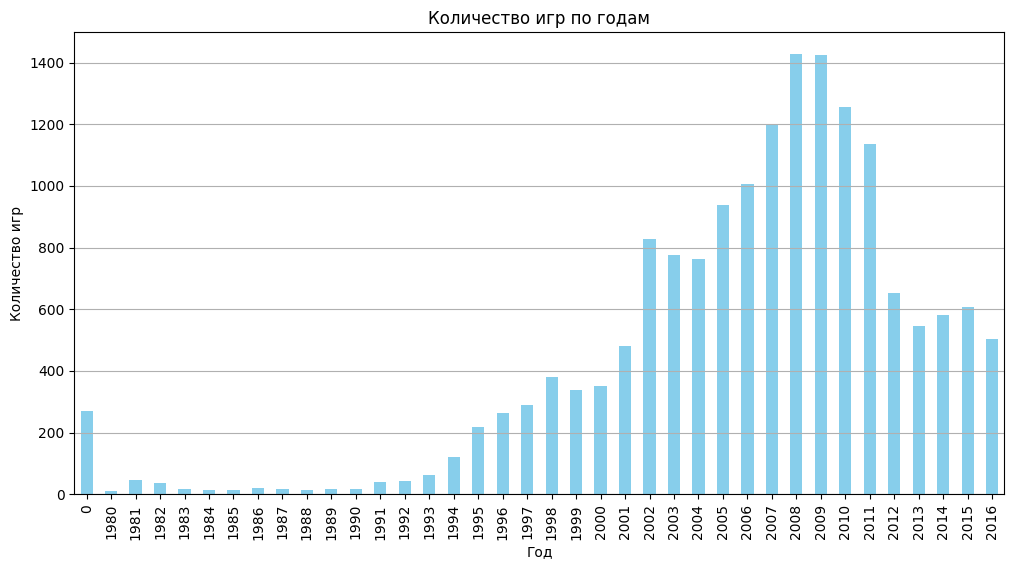

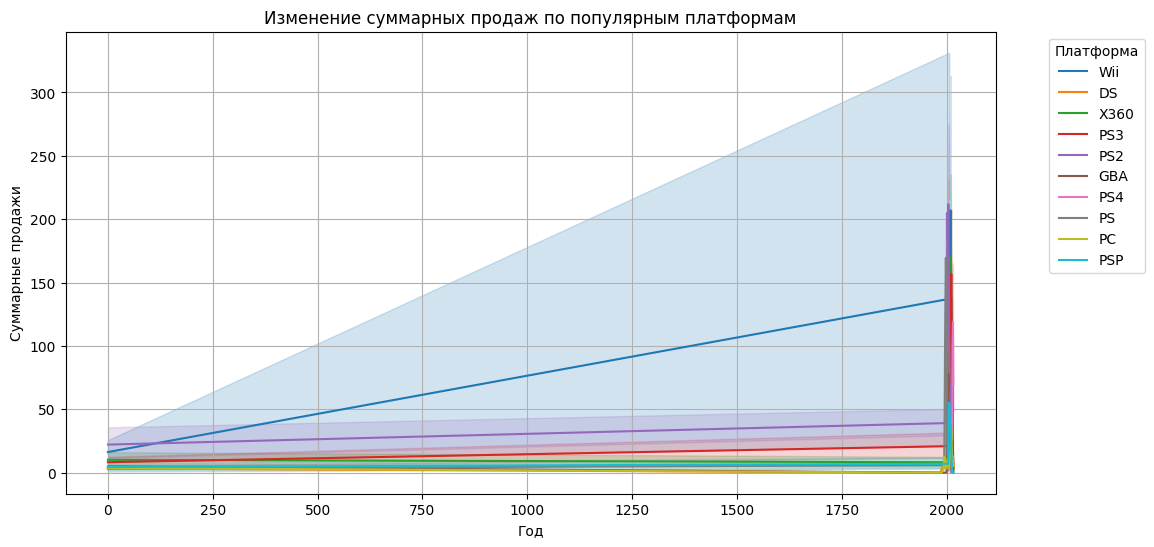

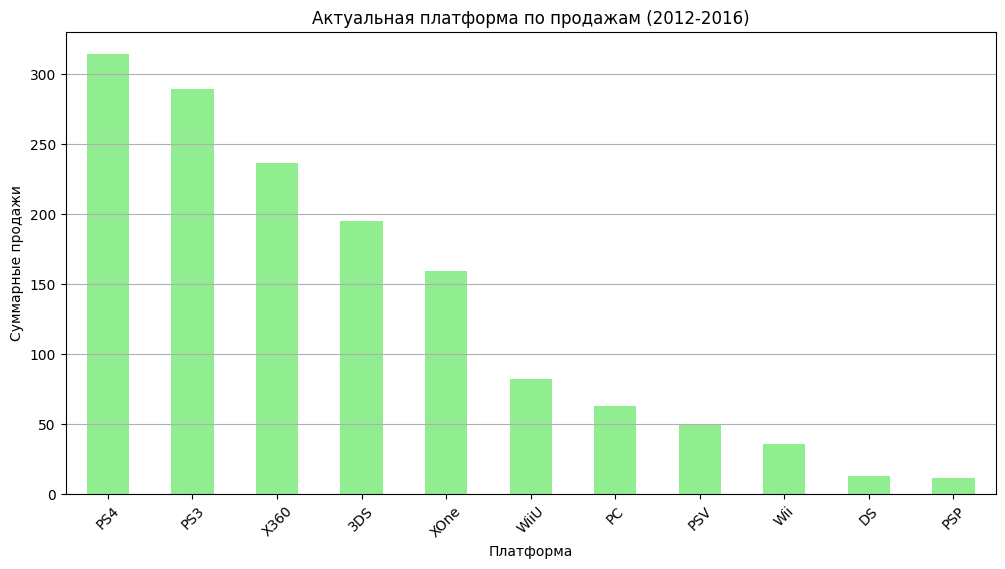

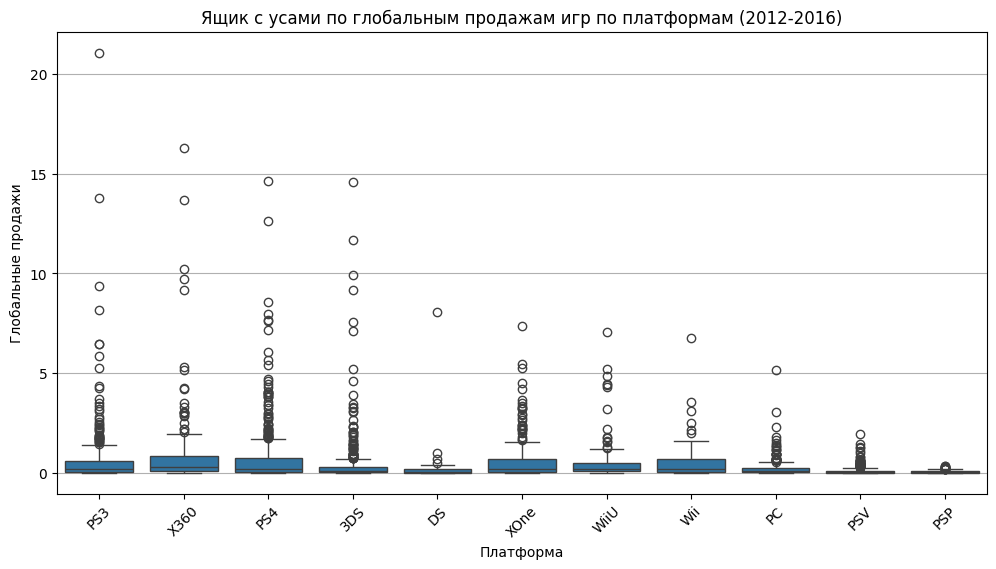

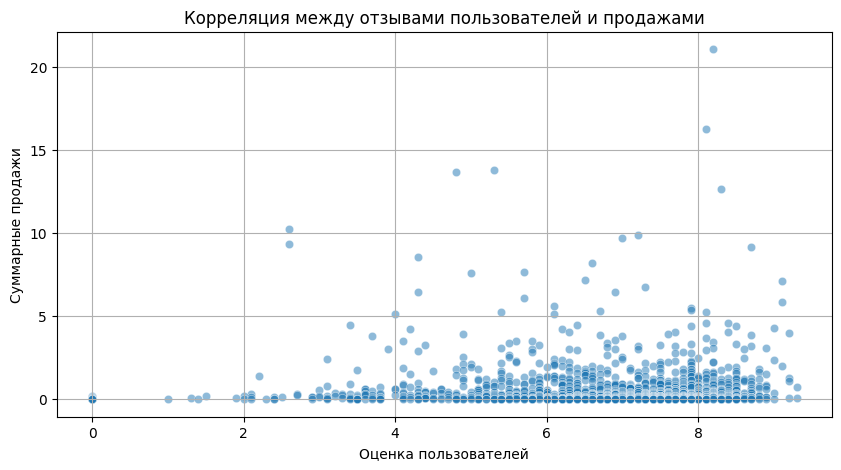

Корреляция между оценками пользователей и продажами: 0.02
Корреляция между оценками критиков и продажами: 0.31


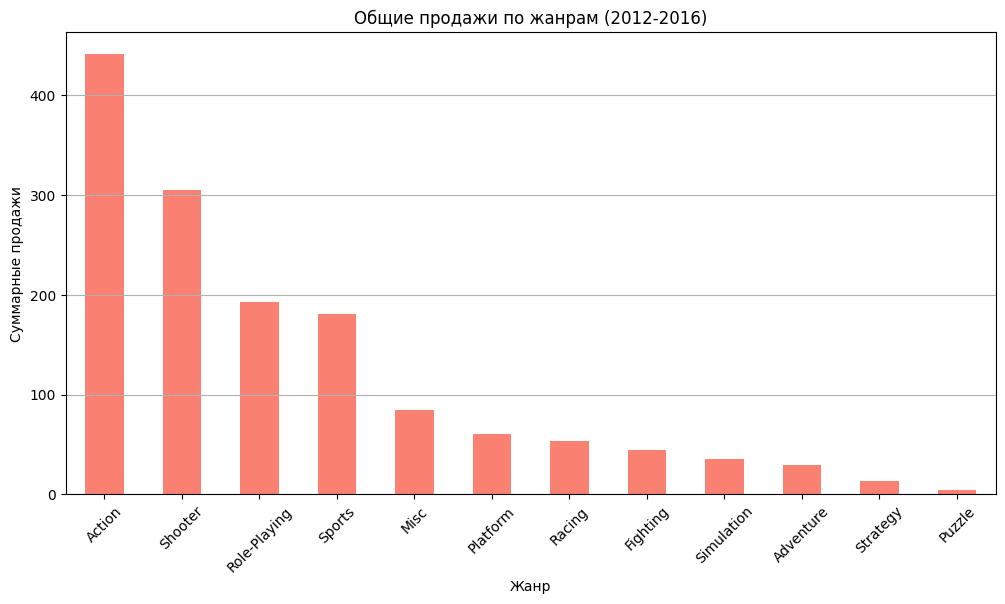

In [3]:
# Импортирование библиотек
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = pd.read_csv('update_games.csv')

# Анализ числа игр за разные годы
plt.figure(figsize=(12, 6))
data['year_of_release'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(axis='y')
plt.show()

# Анализ продаж по платформам
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data[data['platform'].isin(top_platforms.index)],
             x='year_of_release',
             y='total_sales',
             hue='platform',
             estimator='sum')
plt.title('Изменение суммарных продаж по популярным платформам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Определение актуального периода
# Можно выбрать последние 5 лет выпуска (например, 2012 - 2016)
current_data = data[data['year_of_release'] >= 2012]

# Анализ платформ на рост или падение продаж
current_platform_sales = current_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
current_platform_sales.plot(kind='bar', color='lightgreen')
plt.title('Актуальная платформа по продажам (2012-2016)')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# График «ящик с усами» по глобальным продажам игр
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=current_data)
plt.title('Ящик с усами по глобальным продажам игр по платформам (2012-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Исследование влияния отзывов на продажи
# Приведём данные, где есть отзывы
reviews_data = current_data.dropna(subset=['user_score', 'critic_score'])
plt.figure(figsize=(10, 5))
sns.scatterplot(x='user_score', y='total_sales', data=reviews_data, alpha=0.5)
plt.title('Корреляция между отзывами пользователей и продажами')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.grid()
plt.show()

# Вычисление корреляции
user_reviews_correlation = reviews_data['user_score'].corr(reviews_data['total_sales'])
critic_reviews_correlation = reviews_data['critic_score'].corr(reviews_data['total_sales'])
print(f'Корреляция между оценками пользователей и продажами: {user_reviews_correlation:.2f}')
print(f'Корреляция между оценками критиков и продажами: {critic_reviews_correlation:.2f}')

# Общий анализ жанров
genre_sales = current_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='salmon')
plt.title('Общие продажи по жанрам (2012-2016)')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

ВЫВОДЫ:

---
▎1. Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

*   Анализ количества выпущенных игр по годам позволяет выявить тенденции в игровой индустрии. Если в какие-то годы происходит резкий рост или падение числа релизов, это может говорить об изменениях в предпочтениях игроков, экономических факторах или технологических инновациях (см. График 1).
*   Данные за все рассматриваемые периоды имеют большое значение, поскольку они позволяют увидеть долгосрочные тенденции и определить факторы, которые оказывают влияние на рынок.

▎2. Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?

*   Анализ данных о продажах по платформам позволяет определить, какие из них были наиболее востребованы и прибыльны в разные годы (см. График 2).
*   Как правило, новые платформы появляются в течение одного–двух лет после выхода новых технологий или игровых приставок. Старые платформы могут сохранять актуальность на протяжении пяти–десяти лет, но со временем их востребованность снижается. Это позволяет определить типичный срок для анализа жизненного цикла платформ.

▎3. Актуальный период для прогноза на 2017 год

*   Период, на который стоит обратить внимание, можно определить исходя из анализа предыдущих данных. Например, если вы заметили, что продажи начали расти с 2015 года и продолжили увеличиваться в 2016 году, то эти годы будут важны для прогнозирования ситуации на 2017 год (см. График 3).

▎4. Какие платформы лидируют по продажам, растут или падают?

*  В результате анализа продаж по платформам можно выделить несколько успешных игроков на рынке. Например, если PS4 и Xbox One демонстрируют последовательный рост в последние годы, их можно рассматривать как потенциально прибыльные.

▎5. График «ящик с усами» по глобальным продажам игр по платформам

*   Если у некоторых платформ наблюдается значительный разброс значений, это может свидетельствовать о наличии как успешных, так и провальных игр. В то же время платформы с меньшим разбросом значений могут демонстрировать большую стабильность (см. График 4).

▎6. Влияние отзывов пользователей и критиков на продажи

*    Если наблюдается положительная и значительная корреляция, это свидетельствует о том, что положительные отзывы способствуют росту продаж. Наоборот, если корреляция низкая или отрицательная, это может означать, что отзывы не играют ключевую роль в процессе принятия решений о покупках (см. График 5).

▎7. Соотнесите выводы с продажами игр на других платформах

*   Если одна платформа демонстрирует высокие продажи при наличии высоких оценок пользователей, в то время как другая показывает низкие продажи при аналогичных оценках, это может указывать на наличие других факторов, которые влияют на объемы продаж, таких как маркетинг или наличие эксклюзивных игр.

▎8. Общее распределение игр по жанрам

*   Анализ распределения игр по жанрам дает возможность определить наиболее прибыльные жанры и оценить их популярность среди игроков (см. График 6).

**Задание 3:** Портрет пользователя каждого региона (Шаг 4)

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         0.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         0.0    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

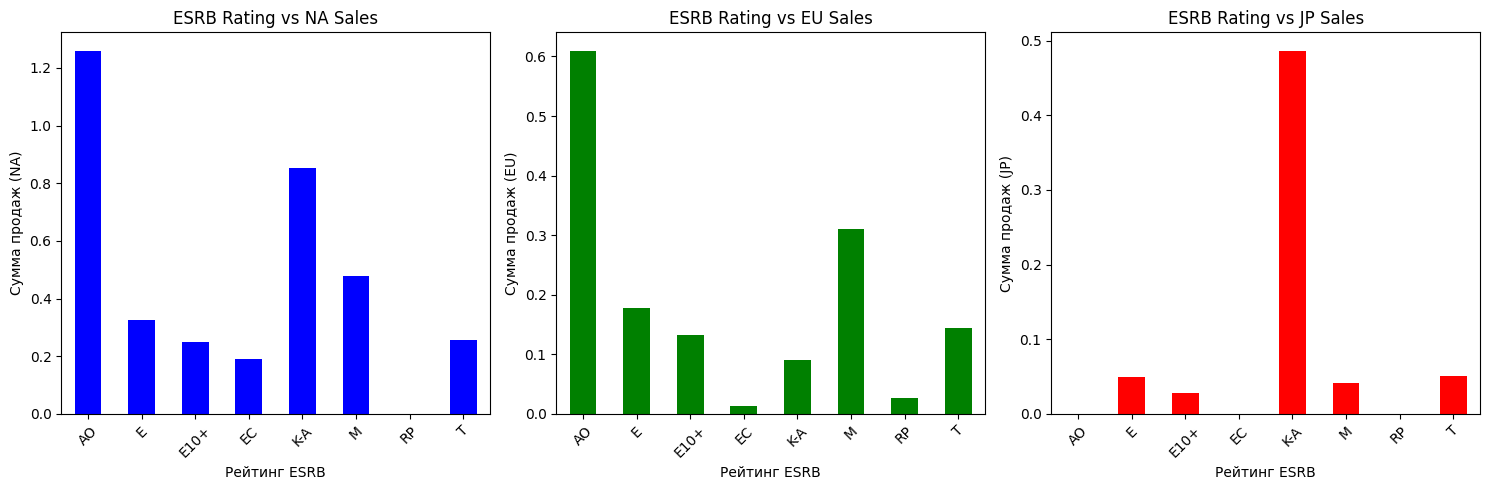

In [4]:
# Загрузка данных
data = pd.read_csv('update_games.csv')

# Убедимся, что данные загружены правильно
print(data.head())

# Находим самые популярные платформы (топ-5) для каждого региона
platforms_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platforms_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platforms_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Вывод результатов
print("Топ-5 платформ в NA:\n", platforms_na)
print("\nТоп-5 платформ в EU:\n", platforms_eu)
print("\nТоп-5 платформ в JP:\n", platforms_jp)

# Находим самые популярные жанры (топ-5) для каждого региона
genres_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genres_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genres_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Вывод результатов
print("\nТоп-5 жанров в NA:\n", genres_na)
print("\nТоп-5 жанров в EU:\n", genres_eu)
print("\nТоп-5 жанров в JP:\n", genres_jp)

# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
# Для этого создадим новый столбец для продаж в регионе и найдем средние значения
esrb_sales_na = data.groupby('rating')['na_sales'].mean()
esrb_sales_eu = data.groupby('rating')['eu_sales'].mean()
esrb_sales_jp = data.groupby('rating')['jp_sales'].mean()

# Визуализация
plt.figure(figsize=(15, 5))

# NA
plt.subplot(1, 3, 1)
esrb_sales_na.plot(kind='bar', color='blue')
plt.title('ESRB Rating vs NA Sales')
plt.ylabel('Сумма продаж (NA)')
plt.xlabel('Рейтинг ESRB')
plt.xticks(rotation=45)

# EU
plt.subplot(1, 3, 2)
esrb_sales_eu.plot(kind='bar', color='green')
plt.title('ESRB Rating vs EU Sales')
plt.ylabel('Сумма продаж (EU)')
plt.xlabel('Рейтинг ESRB')
plt.xticks(rotation=45)

# JP
plt.subplot(1, 3, 3)
esrb_sales_jp.plot(kind='bar', color='red')
plt.title('ESRB Rating vs JP Sales')
plt.ylabel('Сумма продаж (JP)')
plt.xlabel('Рейтинг ESRB')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

ВЫВОДЫ:

---
▎1. Самые популярные платформы (топ-5)

Сравнение долей продаж:

*   В Северной Америке (NA) лидерами по продажам могут быть такие платформы, как PlayStation или Xbox. В то же время в Европе (EU) и Японии (JP) более популярными могут оказаться другие платформы — например, Nintendo или PC. Это может объясняться тем, что у потребителей из разных регионов разные предпочтения, а также доступностью платформ и особенностями маркетинговых стратегий. Кроме того, некоторые платформы успешнее в определённых жанрах игр, что тоже влияет на общие результаты продаж.

▎2. Самые популярные жанры (топ-5)

Разница в жанрах:

*   В Северной Америке, например, могут быть популярны игры в жанрах экшен и спорт. А в Европе и Японии больший интерес могут вызывать ролевые игры или стратегии. Это может быть связано с культурными особенностями и разными игровыми стилями, характерными для каждого региона. Кроме того, некоторые жанры игр могут больше привлекать определённые возрастные группы или демографические категории, что также влияет на их популярность.

▎3. Влияние рейтинга ESRB на продажи в отдельном регионе

Анализ влияния:

*   Значительное влияние на продажи игр может оказывать возрастной рейтинг, установленный системой классификации контента ESRB (в Северной Америке) или PEGI (в Европе и Японии).Например, игры с рейтингом «E» (для всех), как правило, лучше продаются среди семейной аудитории. А игры с рейтингом «M» (от 17 лет), наоборот, имеют более узкую аудиторию.

**!** Диаграммы, которые были составлены, могут показать разницу в средних продажах в зависимости от рейтинга ESRB и наглядно продемонстрировать, какой рейтинг способствует более высоким продажам в каждом регионе.


▎ОБЩИЙ ВЫВОД

---

Анализ данных о продажах видеоигр позволил определить основные тенденции, которые отражают динамику рынка и потребительские предпочтения в разных регионах.